## 程式說明  Portfolio Optimization with Python using Efficient Frontier with Practical Examples
  https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-example/ 


## 範例程式 https://ithelp.ithome.com.tw/articles/10249694


In [2]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Data
test = data.DataReader(['0050.TW','00679B.TWO'], 'yahoo', start='2017/01/11', end='2021/12/31')
test.head()

Attributes  Adj Close                 Close                  High             \
Symbols       0050.TW 00679B.TWO    0050.TW 00679B.TWO    0050.TW 00679B.TWO   
Date                                                                           
2017-01-11  72.400002  39.998798  72.400002  39.998798  72.849998  39.998798   
2017-01-12  73.150002  39.790501  73.150002  39.790501  73.300003  39.790501   
2017-01-13  72.599998  39.560101  72.599998  39.560101  72.800003  39.560101   
2017-01-16  72.000000        NaN  72.000000        NaN  72.400002        NaN   
2017-01-17  72.300003  39.689999  72.300003  39.689999  72.400002  39.779999   

Attributes        Low                  Open                Volume             
Symbols       0050.TW 00679B.TWO    0050.TW 00679B.TWO    0050.TW 00679B.TWO  
Date                                                                          
2017-01-11  72.400002  39.998798  72.800003  39.998798  1898053.0        0.0  
2017-01-12  72.599998  39.790501  72.599998  39.790501  4857459.0        0.0  
2017-01-13  72.599998  39.560101  72.800003  39.560101  3909860.0        0.0  
2017-01-16  71.800003        NaN  72.400002        NaN  2418439.0        NaN  
2017-01-17  72.000000  39.509998  72.000000  39.700001  1572741.0   928000.0

In [3]:
# Closing price
test = test['Adj Close']
test.head()

Symbols,0050.TW,00679B.TWO
Date,,
2017-01-11,72.400002,39.998798
2017-01-12,73.150002,39.790501
2017-01-13,72.599998,39.560101
2017-01-16,72.000000,NaN
2017-01-17,72.300003,39.689999


In [4]:
# Log of percentage change
etf_0050 = test['0050.TW'].pct_change().apply(lambda x: np.log(1+x))
etf_0050.head()

Date
2017-01-11         NaN
2017-01-12    0.010306
2017-01-13   -0.007547
2017-01-16   -0.008299
2017-01-17    0.004158
Name: 0050.TW, dtype: float64

In [5]:
# Variance
var_etf_0050 = etf_0050.var()
var_etf_0050

0.00011387110674204043

In [7]:
# Log of Percentage change for Facebook
etf_00679B = test['00679B.TWO'].pct_change().apply(lambda x: np.log(1+x))
etf_00679B.head()

Date
2017-01-11         NaN
2017-01-12   -0.005221
2017-01-13   -0.005807
2017-01-16    0.000000
2017-01-17    0.003278
Name: 00679B.TWO, dtype: float64

In [8]:
# Variance
var_etf_00679B = etf_00679B.var()
var_etf_00679B

7.289805817802401e-05

In [9]:
# Volatility
etf_0050_vol = np.sqrt(var_etf_0050 * 250)
etf_00679B_vol = np.sqrt(var_etf_00679B * 250)
etf_0050_vol, etf_00679B_vol

(0.1687239659488542, 0.13499820200471563)

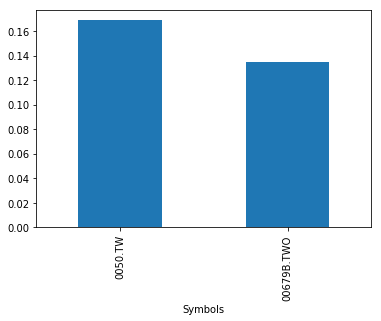

In [10]:
# Volatility of both stocks
test.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')

In [11]:
# Log of Percentage change
test1 = test.pct_change().apply(lambda x: np.log(1+x))
test1.head()

Symbols,0050.TW,00679B.TWO
Date,,
2017-01-11,NaN,NaN
2017-01-12,0.010306,-0.005221
2017-01-13,-0.007547,-0.005807
2017-01-16,-0.008299,0.000000
2017-01-17,0.004158,0.003278


In [12]:
# Covariance
test1['0050.TW'].cov(test1['00679B.TWO'])

-1.906106401383426e-05

In [13]:
# Correlation
test1['0050.TW'].corr(test1['00679B.TWO'])

-0.20920997571046213

In [14]:
# Expected Returns
test2 = test.pct_change().apply(lambda x: np.log(1+x))
test2.head()

Symbols,0050.TW,00679B.TWO
Date,,
2017-01-11,NaN,NaN
2017-01-12,0.010306,-0.005221
2017-01-13,-0.007547,-0.005807
2017-01-16,-0.008299,0.000000
2017-01-17,0.004158,0.003278


In [15]:
# Define weights for allocation
w = [0.2, 0.8]
e_r_ind = test2.mean()
e_r_ind

Symbols
0050.TW       0.000576
00679B.TWO    0.000025
dtype: float64

In [16]:
# Total expected return
e_r = (e_r_ind*w).sum()
e_r

0.00013502748098413522

## 實戰

In [3]:
# Import data
df = data.DataReader(['0050.TW','00679B.TWO'], 'yahoo', start='2017/01/11', end='2021/12/31')
df.head()

Attributes  Adj Close                 Close                  High             \
Symbols       0050.TW 00679B.TWO    0050.TW 00679B.TWO    0050.TW 00679B.TWO   
Date                                                                           
2017-01-11  72.400002  39.998798  72.400002  39.998798  72.849998  39.998798   
2017-01-12  73.150002  39.790501  73.150002  39.790501  73.300003  39.790501   
2017-01-13  72.599998  39.560101  72.599998  39.560101  72.800003  39.560101   
2017-01-16  72.000000        NaN  72.000000        NaN  72.400002        NaN   
2017-01-17  72.300003  39.689999  72.300003  39.689999  72.400002  39.779999   

Attributes        Low                  Open                Volume             
Symbols       0050.TW 00679B.TWO    0050.TW 00679B.TWO    0050.TW 00679B.TWO  
Date                                                                          
2017-01-11  72.400002  39.998798  72.800003  39.998798  1898053.0        0.0  
2017-01-12  72.599998  39.790501  72.599998  39.790501  4857459.0        0.0  
2017-01-13  72.599998  39.560101  72.800003  39.560101  3909860.0        0.0  
2017-01-16  71.800003        NaN  72.400002        NaN  2418439.0        NaN  
2017-01-17  72.000000  39.509998  72.000000  39.700001  1572741.0   928000.0

In [4]:
# Closing price
df = df['Adj Close']
df.head()

Symbols,0050.TW,00679B.TWO
Date,,
2017-01-11,72.400002,39.998798
2017-01-12,73.150002,39.790501
2017-01-13,72.599998,39.560101
2017-01-16,72.000000,NaN
2017-01-17,72.300003,39.689999


In [5]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,0050.TW,00679B.TWO
Symbols,,
0050.TW,0.000114,-0.000019
00679B.TWO,-0.000019,0.000073


In [6]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,0050.TW,00679B.TWO
Symbols,,
0050.TW,1.00000,-0.20921
00679B.TWO,-0.20921,1.00000


In [7]:
# Randomly weighted portfolio's variance
w = {'0050.TW': 0.1, '00679B.TWO': 0.9}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

5.6755146669129696e-05

In [8]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
0050.TW       0.163575
00679B.TWO    0.017544
dtype: float64

In [9]:
# Portfolio returns
w = [0.2, 0.8]
port_er = (w*ind_er).sum()
port_er

0.04675053054756696

In [10]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
0050.TW       0.168724
00679B.TWO    0.134998
dtype: float64

In [11]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
0050.TW,0.163575,0.168724
00679B.TWO,0.017544,0.134998


In [12]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [13]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [14]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [15]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,0050.TW weight,00679B.TWO weight
0,0.084618,0.094693,0.459311,0.540689
1,0.040562,0.111238,0.157624,0.842376
2,0.108895,0.107065,0.625557,0.374443
3,0.140504,0.139177,0.842013,0.157987
4,0.049345,0.104297,0.217768,0.782232


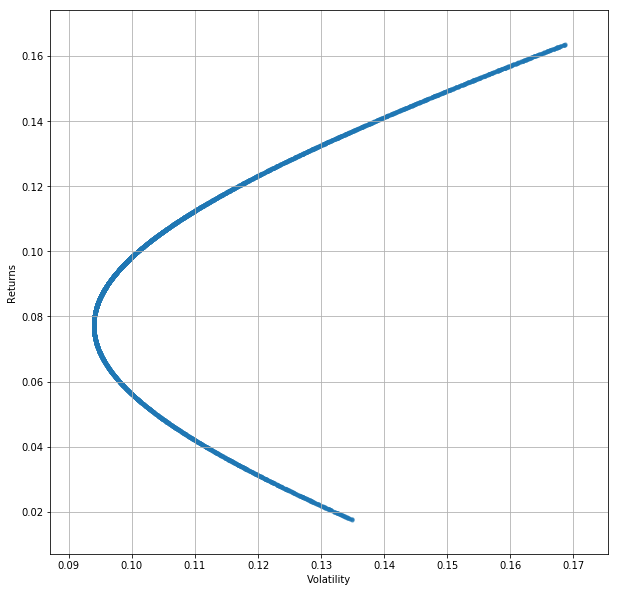

In [16]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [17]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns              0.077262
Volatility           0.093936
0050.TW weight       0.408936
00679B.TWO weight    0.591064
Name: 7124, dtype: float64

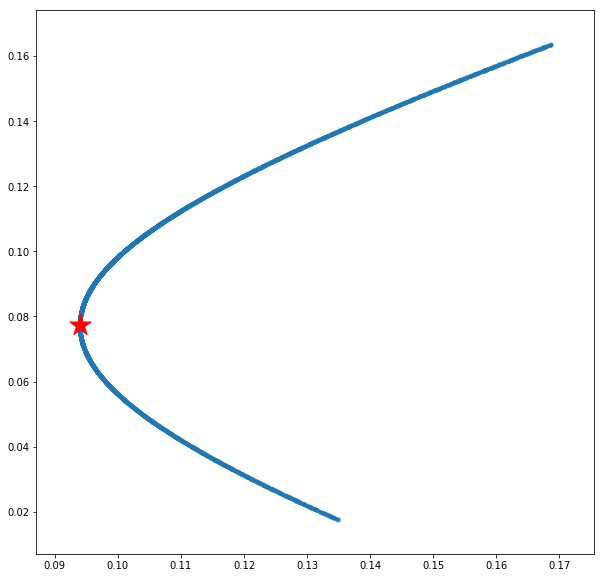

In [18]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [19]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns              0.127015
Volatility           0.123901
0050.TW weight       0.749644
00679B.TWO weight    0.250356
Name: 3913, dtype: float64

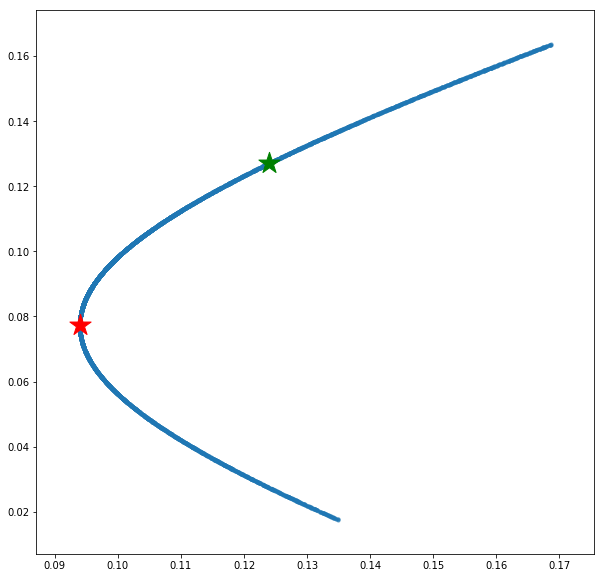

In [20]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

## 資產配置組合
### Returns              0.127017
### Volatility           0.123903
### 0050.TW weight       0.749655
### 00679B.TWO weight    0.250345

In [21]:
portfolios[portfolios['0050.TW weight']>0.8]

,Returns,Volatility,0050.TW weight,00679B.TWO weight
3,0.140504,0.139177,0.842013,0.157987
53,0.139112,0.137518,0.832481,0.167519
56,0.138201,0.136442,0.826245,0.173755
61,0.152844,0.154554,0.926513,0.073487
63,0.138247,0.136496,0.826560,0.173440
78,0.153925,0.155953,0.933920,0.066080
86,0.139928,0.138489,0.838069,0.161931
93,0.139429,0.137894,0.834652,0.165348
115,0.161760,0.166284,0.987573,0.012427
116,0.144845,0.144456,0.871737,0.128263


In [22]:
portfolios[(portfolios['0050.TW weight'] >0.5) & (portfolios['0050.TW weight'] <0.501)]

,Returns,Volatility,0050.TW weight,00679B.TWO weight
921,0.090616,0.096407,0.500384,0.499616
1255,0.090573,0.096392,0.500091,0.499909
1363,0.090560,0.096387,0.500001,0.499999
1382,0.090581,0.096395,0.500147,0.499853
1467,0.090611,0.096406,0.500351,0.499649
1872,0.090603,0.096403,0.500299,0.499701
2019,0.090630,0.096413,0.500483,0.499517
2641,0.090686,0.096433,0.500864,0.499136
3016,0.090574,0.096392,0.500101,0.499899
5034,0.090697,0.096437,0.500939,0.499061
